In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import tensorflow as tf

2026-01-14 15:34:01.383284: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-14 15:34:01.487275: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-14 15:34:04.153433: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/home/1987b19f-2ad9-4fe9-b988-5051a7b1ab4c/.local/lib/python3.12/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [4]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [5]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

/home/1987b19f-2ad9-4fe9-b988-5051a7b1ab4c/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-01-14 15:34:06.152424: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [6]:
modelo.compile (
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [7]:
print('Comenzando entrenamiento...')
historial = modelo.fit(celsius, fahrenheit, epochs=500, verbose=False)
print('Modelo entrenado')

Comenzando entrenamiento...
Modelo entrenado


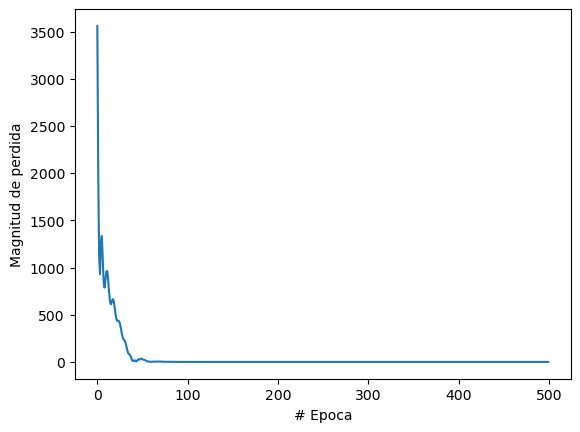

In [8]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [9]:
print("Hagamos una predicción")
resultado = modelo.predict(np.array([[100.0]]))
print("El resultado es", resultado[0][0], "fahrenheit")

Hagamos una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
El resultado es 211.74745 fahrenheit


In [11]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.36552867,  0.6999782 , -1.0496823 ]], dtype=float32), array([ 3.646525 ,  4.0715537, -3.8357632], dtype=float32)]
[array([[ 1.4392152 ,  0.5664103 ,  0.29139733],
       [ 0.5397846 ,  1.112236  ,  0.4224854 ],
       [ 0.1504055 , -1.0561512 ,  0.6344869 ]], dtype=float32), array([3.51092  , 3.951621 , 2.7027895], dtype=float32)]
[array([[0.7932649 ],
       [1.3006147 ],
       [0.30288965]], dtype=float32), array([3.8094425], dtype=float32)]
